In [1]:
#import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
import glob

In [2]:
#actual COVID-19 cases data for PA
url2 = 'https://raw.githubusercontent.com/IvanVoinovGitHub/Covid19-Analysis-Modeling/main/Data/COVID-19_Aggregate_Cases_Current_Daily_County_Health.csv'
df1 = pd.read_csv(url2)

In [3]:
#reading all the raw data, filtering PA cases data, and ensemble back into one dataframe
path = "/Users/dantr/Downloads/DDSmodel_rawdata/*.csv"
all_data = []
for fname in glob.glob(path):
    df3=pd.read_csv(fname)
    df2_case = df3[df3['target'].str.contains('case')]
    df2_casesPA = df2_case[(df2_case["type"]=="point") & (df2_case["location"]=="42")]
    all_data.append(df2_casesPA)

In [4]:
df2 = pd.concat(all_data)
df2

,forecast_date,location,target,type,quantile,target_end_date,value
2534,2020-07-27,42,1 wk ahead inc case,point,NaN,2020-08-01,5054.403600
5446,2020-07-27,42,2 wk ahead inc case,point,NaN,2020-08-08,4941.833200
8358,2020-07-27,42,3 wk ahead inc case,point,NaN,2020-08-15,3905.944000
11270,2020-07-27,42,4 wk ahead inc case,point,NaN,2020-08-22,3008.857800
2534,2020-08-03,42,1 wk ahead inc case,point,NaN,2020-08-08,5611.584782
...,...,...,...,...,...,...,...
11270,2021-03-22,42,4 wk ahead inc case,point,NaN,2021-04-17,12264.435400
2534,2021-03-29,42,1 wk ahead inc case,point,NaN,2021-04-03,37470.603200
5446,2021-03-29,42,2 wk ahead inc case,point,NaN,2021-04-10,65539.081000
8358,2021-03-29,42,3 wk ahead inc case,point,NaN,2021-04-17,117806.938400


In [5]:
#convert date to datetime object
df1['Date'] = pd.to_datetime(df1['Date'])
df2['forecast_date'] = pd.to_datetime(df2['forecast_date'])
df2['target_end_date'] = pd.to_datetime(df2['target_end_date'])

In [6]:
#sort datasets by date
df1.sort_values(by='Date')
df2.sort_values(by='target_end_date')

,forecast_date,location,target,type,quantile,target_end_date,value
2534,2020-07-27,42,1 wk ahead inc case,point,NaN,2020-08-01,5054.403600
5446,2020-07-27,42,2 wk ahead inc case,point,NaN,2020-08-08,4941.833200
2534,2020-08-03,42,1 wk ahead inc case,point,NaN,2020-08-08,5611.584782
2534,2020-08-09,42,1 wk ahead inc case,point,NaN,2020-08-15,1084.939400
5446,2020-08-03,42,2 wk ahead inc case,point,NaN,2020-08-15,5518.656600
...,...,...,...,...,...,...,...
8358,2021-03-22,42,3 wk ahead inc case,point,NaN,2021-04-10,13897.246000
5446,2021-03-29,42,2 wk ahead inc case,point,NaN,2021-04-10,65539.081000
8358,2021-03-29,42,3 wk ahead inc case,point,NaN,2021-04-17,117806.938400
11270,2021-03-22,42,4 wk ahead inc case,point,NaN,2021-04-17,12264.435400


In [7]:
#need to group the Actual Daily Cases for PA by date
df1_groupedbydate = df1.groupby(["Date"]).sum()
#df1_groupedbydate

In [8]:
#filterinng out data for PA (FIPS code = 42)
df2_2 = df2[df2['target'].str.contains('1')]
df2_2.shape

(42, 7)

In [9]:
#finding weekly increase in cases in PA
df_weekly=df2_2.groupby('target_end_date').agg('last').reset_index()
df_weekly.rename(
    columns={"target_end_date":"Date"},inplace=True)
#df_weekly

In [10]:
df_weekly.dtypes

Date             datetime64[ns]
forecast_date    datetime64[ns]
location                 object
target                   object
type                     object
quantile                float64
value                   float64
dtype: object

In [11]:
df1_groupedbydate.dtypes

New Cases                                       int64
7-day Average New Cases                       float64
Cumulative cases                                int64
Population (2019)                               int64
New Case Rate                                 float64
7-Day Average New Case Rate                   float64
Cumulative Case Rate                          float64
County FIPS Code                                int64
Longitude                                     float64
Latitude                                      float64
dtype: object

In [12]:
#creating a column for daily additions
df_weekly["dayRate"] = df_weekly["value"] / 7
#df_weekly

In [13]:
merged_weekly = pd.merge(left=df1_groupedbydate[['New Cases']], right=df_weekly, left_on='Date', right_on='Date')
merged_weekly.head(5)

,Date,New Cases,forecast_date,location,target,type,quantile,value,dayRate
0,2020-08-01,1320,2020-07-27,42,1 wk ahead inc case,point,NaN,5054.403600,722.057657
1,2020-08-08,1556,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969
2,2020-08-15,1368,2020-08-10,42,1 wk ahead inc case,point,NaN,5169.395000,738.485000
3,2020-08-22,1200,2020-08-17,42,1 wk ahead inc case,point,NaN,4972.474800,710.353543
4,2020-08-29,1380,2020-08-24,42,1 wk ahead inc case,point,NaN,4562.377800,651.768257


In [14]:
merged_weekly.shape

(35, 9)

In [15]:
#select all the dates to be merged with prediction table
mask = (df1['Date'] > '2020-08-01') & (df1['Date'] <= '2021-04-03')
df1_copy = df1.loc[mask]
df1_copy = df1_copy.groupby(["Date"]).sum()
#df1_copy

In [16]:
merged_df = df1_copy[['New Cases']].merge(df_weekly, how='left', left_on = 'Date', right_on = 'Date')
merged_df.head(5)

,Date,New Cases,forecast_date,location,target,type,quantile,value,dayRate
0,2020-08-02,1154,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-03,1674,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-04,1446,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-05,1620,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-06,1532,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#generate the rest of the rows to fill in between bi-weekly data 
merged_df_new = merged_df
for i, row in merged_df.iterrows():
    for _ in range(6):
        merged_df_new.at[i,'location']="42"

In [21]:
merged_weekly = pd.merge(left=df1_groupedbydate[['New Cases']], right=df_weekly, left_on='Date', right_on='Date')
merged_weekly.head(5)

,Date,New Cases,forecast_date,location,target,type,quantile,value,dayRate
0,2020-08-01,1320,2020-07-27,42,1 wk ahead inc case,point,NaN,5054.403600,722.057657
1,2020-08-08,1556,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969
2,2020-08-15,1368,2020-08-10,42,1 wk ahead inc case,point,NaN,5169.395000,738.485000
3,2020-08-22,1200,2020-08-17,42,1 wk ahead inc case,point,NaN,4972.474800,710.353543
4,2020-08-29,1380,2020-08-24,42,1 wk ahead inc case,point,NaN,4562.377800,651.768257


In [22]:
#fill out all weekly the empty dayRate rows with the same average dayRate
merged_df_new = merged_df_new.fillna(method='bfill')
merged_df_new.head(5)

,Date,New Cases,forecast_date,location,target,type,quantile,value,dayRate
0,2020-08-02,1154,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969
1,2020-08-03,1674,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969
2,2020-08-04,1446,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969
3,2020-08-05,1620,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969
4,2020-08-06,1532,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969


In [23]:
merged_df_new.shape

(245, 9)

In [24]:
#merging actual cases and predcited by week
merged_df_new = pd.merge(merged_df_new, merged_weekly, on='Date', how='left')
merged_df_new.drop(['forecast_date_y', 'location_y', 
                'target_y', 'type_y','quantile_y','value_y','dayRate_y'], axis=1, inplace=True)

In [25]:
merged_df_new.rename(columns={'Cumulative cases_x':'Cumulative cases', 'forecast_date_x':'forecast_date',
                             'location_x':'location','target_x':'target','type_x':'type',
                             'quantile_x':'quantile','value_x':'value','dayRate_x':'dayRate'}, inplace=True)
merged_df_new.head(5)

,Date,New Cases_x,forecast_date,location,target,type,quantile,value,dayRate,New Cases_y
0,2020-08-02,1154,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
1,2020-08-03,1674,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
2,2020-08-04,1446,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
3,2020-08-05,1620,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
4,2020-08-06,1532,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN


In [ ]:
merged_df_new.shape

In [ ]:
#merged_df_new.dtypes

In [ ]:
#filling out all the days of the week with predicted values from the model
#for i in range(6, 245, 7):
    #merged_df_new.at[i-1,'Cumulative cases_y']=merged_df_new.at[i,'Cumulative cases_y'] - merged_df_new.at[i,'dayRate']
    #merged_df_new.at[i-2,'Cumulative cases_y']=merged_df_new.at[i-1,'Cumulative cases_y'] - merged_df_new.at[i,'dayRate']
    #merged_df_new.at[i-3,'Cumulative cases_y']=merged_df_new.at[i-2,'Cumulative cases_y'] - merged_df_new.at[i,'dayRate']
    #merged_df_new.at[i-4,'Cumulative cases_y']=merged_df_new.at[i-3,'Cumulative cases_y'] - merged_df_new.at[i,'dayRate']
    #merged_df_new.at[i-5,'Cumulative cases_y']=merged_df_new.at[i-4,'Cumulative cases_y'] - merged_df_new.at[i,'dayRate']
    #merged_df_new.at[i-6,'Cumulative cases_y']=merged_df_new.at[i-5,'Cumulative cases_y'] - merged_df_new.at[i,'dayRate']

In [ ]:
#filling missing values
#merged_df_new['Cumulative cases_y'] = merged_df_new['Cumulative cases_y'].fillna(method='ffill')

In [ ]:
#merged_df_new.tail(10)

In [26]:
#renaming columns for predcited and actual cases
merged_df_new.rename(columns={'New Cases_x':'Actual', 'dayRate':'Prediction'}, inplace=True)
merged_df_new.head(5)

,Date,Actual,forecast_date,location,target,type,quantile,value,Prediction,New Cases_y
0,2020-08-02,1154,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
1,2020-08-03,1674,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
2,2020-08-04,1446,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
3,2020-08-05,1620,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN
4,2020-08-06,1532,2020-08-03,42,1 wk ahead inc case,point,NaN,5611.584782,801.654969,NaN


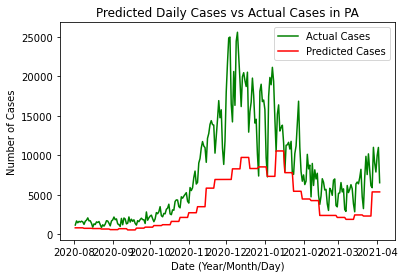

In [27]:
#Create plot of Actual vs. Predicted Cases

#Actual Cases Line
plt.plot(merged_df_new['Date'], merged_df_new['Actual'], color='g', label='Actual Cases')

#Predicted Cases Line
plt.plot(merged_df_new['Date'], merged_df_new['Prediction'], color='r', label='Predicted Cases')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Number of Cases') 
plt.title("Predicted Daily Cases vs Actual Cases in PA")

#Display Plot
plt.legend()
plt.show()

In [28]:
#error calculations
#confirmed = merged_df_new['Actual']
#projected = merged_df_new['Prediction']
error = []
rawerror = []

for index, row in merged_df_new.iterrows():
  rawerror.append(-1*(row['Actual'] - row["Prediction"]) / row['Actual'])
  error.append((abs(row['Actual'] - row["Prediction"])) / row['Actual'])

underpredictCount = 0
overpredictCount = 0
for x in rawerror:
  if x < 0:
    underpredictCount += 1
  elif x > 0:
    overpredictCount += 1

underpredictPerecentage = underpredictCount / len(rawerror)
overpredictPercentage = 1 - underpredictPerecentage

print(underpredictCount)
print(underpredictPerecentage)
print(overpredictCount)
print(overpredictPercentage)
print(len(error))

print(error)
print(rawerror)

241
0.9836734693877551
4
0.01632653061224487
245
[0.305324983599746, 0.5211141165317246, 0.445605139055399, 0.5051512537494487, 0.47672652158884266, 0.5111859945573822, 0.4847975778111227, 0.4034854604200323, 0.5486033007334963, 0.5837175873731679, 0.64151213592233, 0.5625088862559242, 0.5640584415584415, 0.46017178362573097, 0.19461049562682212, 0.4552503505696757, 0.41869595510872104, 0.5422979749631811, 0.5187306620209059, 0.5560290357142857, 0.40803871428571425, 0.23140535714285718, 0.45137352092352095, 0.3584958098987627, 0.49000918846411806, 0.6170574282356891, 0.6083123454670329, 0.5277041614906832, 0.45510814774579034, 0.6555130837912088, 0.682247101678809, 0.7355967580390089, 0.6867616237314598, 0.7036058797459004, 0.5624227262813523, 0.41978901098901106, 0.29045772713993584, 0.6523385055825938, 0.41784199424736346, 0.6611658482142857, 0.6382000297929391, 0.46784329535495184, 0.6122872625928985, 0.754081380123085, 0.6492846872082166, 0.7160876039304611, 0.6699911263398348, 0.7

In [29]:
#accuracy calculations
accuracy = []

for i in error:
  accuracy.append(1 - i)

print(accuracy)

[0.694675016400254, 0.47888588346827543, 0.554394860944601, 0.4948487462505513, 0.5232734784111573, 0.48881400544261777, 0.5152024221888774, 0.5965145395799677, 0.4513966992665037, 0.4162824126268321, 0.35848786407766997, 0.4374911137440758, 0.43594155844155846, 0.539828216374269, 0.8053895043731779, 0.5447496494303243, 0.581304044891279, 0.4577020250368189, 0.4812693379790941, 0.44397096428571425, 0.5919612857142857, 0.7685946428571429, 0.548626479076479, 0.6415041901012373, 0.509990811535882, 0.3829425717643109, 0.39168765453296706, 0.4722958385093168, 0.5448918522542097, 0.34448691620879124, 0.317752898321191, 0.2644032419609911, 0.31323837626854023, 0.2963941202540996, 0.43757727371864774, 0.580210989010989, 0.7095422728600642, 0.34766149441740624, 0.5821580057526365, 0.3388341517857143, 0.3617999702070609, 0.5321567046450482, 0.38771273740710155, 0.245918619876915, 0.35071531279178336, 0.2839123960695389, 0.3300088736601652, 0.294832103610675, 0.39513580896276035, 0.66437648083623

In [30]:
#Create Error and Accuracy Column and insert list data
merged_df_new['Error'] = error
merged_df_new['Accuracy'] = accuracy
merged_df_new['RawError'] = rawerror

print(merged_df_new)

          Date  Actual forecast_date location               target   type  \
0   2020-08-02    1154    2020-08-03       42  1 wk ahead inc case  point   
1   2020-08-03    1674    2020-08-03       42  1 wk ahead inc case  point   
2   2020-08-04    1446    2020-08-03       42  1 wk ahead inc case  point   
3   2020-08-05    1620    2020-08-03       42  1 wk ahead inc case  point   
4   2020-08-06    1532    2020-08-03       42  1 wk ahead inc case  point   
..         ...     ...           ...      ...                  ...    ...   
240 2021-03-30    9032    2021-03-29       42  1 wk ahead inc case  point   
241 2021-03-31    7876    2021-03-29       42  1 wk ahead inc case  point   
242 2021-04-01    9970    2021-03-29       42  1 wk ahead inc case  point   
243 2021-04-02   10988    2021-03-29       42  1 wk ahead inc case  point   
244 2021-04-03    6518    2021-03-29       42  1 wk ahead inc case  point   

     quantile         value   Prediction  New Cases_y     Error  Accuracy  

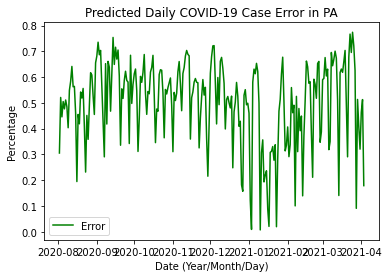

In [31]:
from IPython.core.pylabtools import figsize
#Create plot of Error

#Error Line
plt.plot(merged_df_new['Date'], merged_df_new['Error'], color='g', label='Error')


#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Error in PA")
#Display Plot
plt.legend()

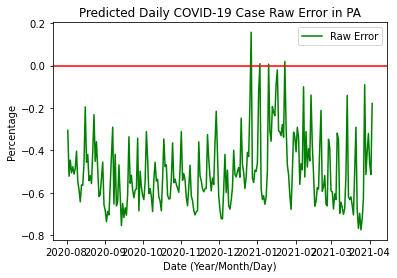

In [32]:
#Create plot of Raw Error

#Raw Error Line
plt.plot(merged_df_new['Date'], merged_df_new['RawError'], color='g', label='Raw Error')
plt.axhline(y=0.0, color='r', linestyle='-')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Raw Error in PA")
#Display Plot
plt.legend()
plt.show()

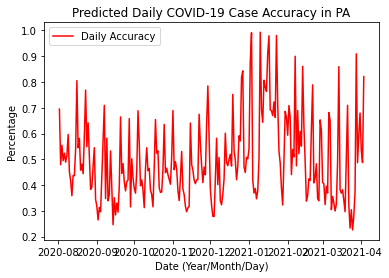

In [33]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(merged_df_new['Date'], merged_df_new['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [34]:
#Calculate Weekly Accuracy Averages
weeklyAccuracy = 0
averageWeeklyAccuracy = []
length = len(accuracy) #   =245
amountOfWeeks = int(length / 7) #   =35
remainderDays = length % 7 #  =0   changed from 7 to 6 so its not 0

i = 0
while i < length:
  weeklyAccuracy += accuracy[i]
  if (i + 1) % 7 == 0 and amountOfWeeks > 0:
    averageWeeklyAccuracy.append(weeklyAccuracy / 7)
    amountOfWeeks -= 1
    weeklyAccuracy = 0
  if remainderDays > 0:
    if (i + 1) % remainderDays == 0 and amountOfWeeks == 0:
      averageWeeklyAccuracy.append(weeklyAccuracy / remainderDays)
      weeklyAccuracy = 0
  i += 1

weeklyDateList = []
i = 0
weeklyDateList.append(merged_df_new['Date'][i])
while i < length:
  if (i + 1) % 7 == 0:
    weeklyDateList.append(merged_df_new['Date'][i])
  i += 1

In [35]:
#Create Dataframe for Weekly Accuracy
i = 0
data = []
while i < len(averageWeeklyAccuracy):
  data.append([weeklyDateList[i], averageWeeklyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Week Of', 'Average Weekly Accuracy'])

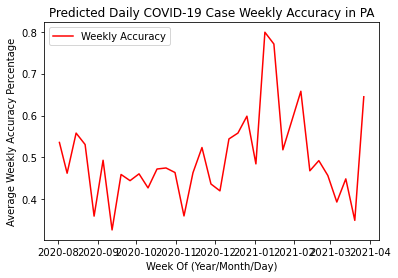

In [36]:
#Create plot of Weekly Accuracy

#Accuracy Line
plt.plot(df['Week Of'], df['Average Weekly Accuracy'], color='r', label='Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Week Of (Year/Month/Day)') 
plt.ylabel('Average Weekly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Weekly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [37]:
#Create Running Weekly Average
runningweeklyAccuracy = 0
runningAverageWeeklyAccuracy = []
length = len(accuracy)

i = 1
j = 8
#Add first week average
runningAverageWeeklyAccuracy.append(averageWeeklyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningweeklyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAverageWeeklyAccuracy.append(runningweeklyAccuracy / 7)
  runningweeklyAccuracy = 0

  i += 1
  j += 1

In [38]:
#Create Dataframe for Running Weekly Accuracy
i = 0
data = []
while i < len(runningAverageWeeklyAccuracy):
  data.append([merged_df_new['Date'][i], runningAverageWeeklyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Weekly Average Accuracy'])

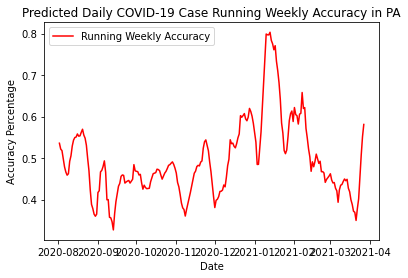

In [39]:
#Create plot of Running Weekly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Weekly Average Accuracy'], color='r', label='Running Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Weekly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

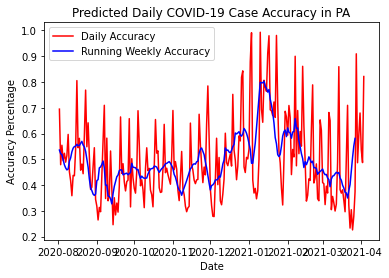

In [41]:
#Plot with combined daily accuracy and running weekly accuracy

#Daily Accuracy
plt.plot(merged_df_new['Date'], merged_df_new['Accuracy'], color='r', label='Daily Accuracy')

#Running Accuracy Line
plt.plot(df['Date'], df['Running Weekly Average Accuracy'], color='b', label='Running Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
merged_df_new.to_csv('DDS_everyday_predictions.csv')

In [43]:
#Calculate Monthly Accuracy Averages
#We are going to use an average of 30 days per month for these calculations

monthlyAccuracy = 0
averageMonthlyAccuracy = []
amountOfMonths = int(length / 30)
remainderDays = length % 30

i = 0
while i < length:
  monthlyAccuracy += accuracy[i]
  if (i + 1) % 30 == 0 and amountOfMonths > 0:
    averageMonthlyAccuracy.append(monthlyAccuracy / 30)
    amountOfMonths -= 1
    monthlyAccuracy = 0
  if (i + 1) % remainderDays == 0 and remainderDays > 0 and amountOfMonths == 0:
    averageMonthlyAccuracy.append(monthlyAccuracy / remainderDays)
    monthlyAccuracy = 0
  i += 1

weeklyDateListForMonths = []
i = 0
weeklyDateListForMonths.append(merged_df_new['Date'][i])
while i < length:
  if (i + 1) % 30 == 0:
    weeklyDateListForMonths.append(merged_df_new['Date'][i])
  i += 1


In [45]:
len(averageMonthlyAccuracy)

10

In [44]:
#Create Dataframe for Monthly Accuracy
i = 0
data = []
while i < len(averageMonthlyAccuracy):
  data.append([weeklyDateListForMonths[i], averageMonthlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Month Of', 'Average Monthly Accuracy'])

IndexError: list index out of range